# Tensorflow - California House Prices

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Let's load, split and scale the California housing dataset.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
print(housing.frame.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


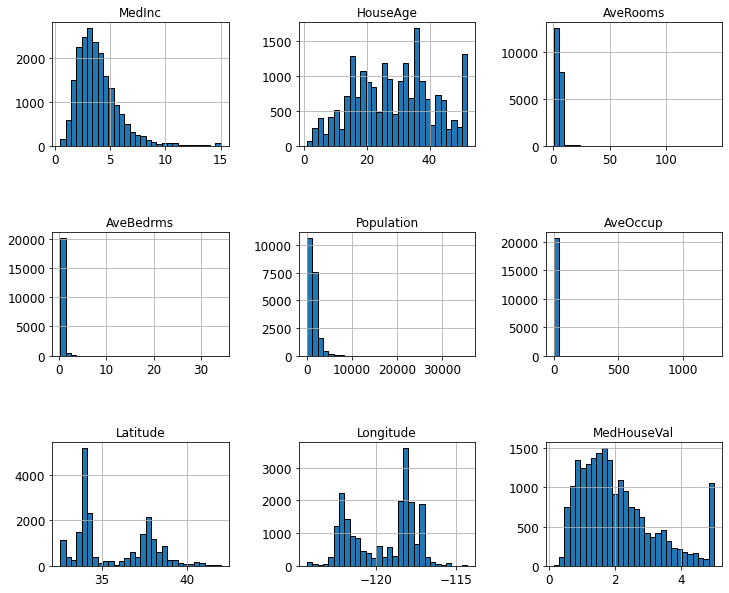

In [6]:
import matplotlib.pyplot as plt

housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

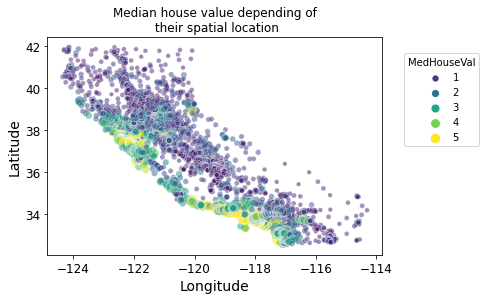

In [7]:
import seaborn as sns

sns.scatterplot(data=housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

## Building NN Model

We prepare the data with a train test split. First split the data into a training and test set.

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target, 
                                                              random_state=42)

In [87]:
housing.data.shape

(20640, 8)

Then split the training data again.

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, 
                                                      random_state=42)

In [82]:
y_train_full

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 15480, dtype: float64

In [70]:
X_train.shape

(11610, 8)

In [71]:
X_train.shape[1:]

(8,)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
X_train.shape

(11610, 8)

In [84]:
y_train.shape

(11610,)

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
X_train.shape

(11610, 8)

In [76]:
X_train.shape[1:]

(8,)

We have a NN with dimensions equal to the number of features in the dataset, a dense hidden layer with 30 neurons and a single output neuron. T

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [80]:
r = model.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid))

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_lo

KeyboardInterrupt: 

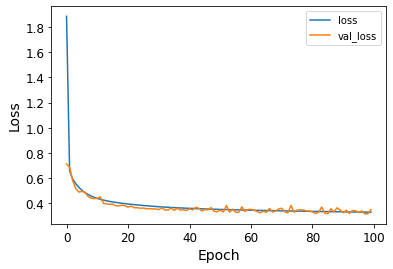

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[-7.52629945e-03, -4.89453040e-02,  2.61093915e-01,
        -1.62766606e-01,  1.13855936e-01,  2.37043485e-01,
         3.10208619e-01,  1.43940032e-01, -9.08149108e-02,
        -6.52892515e-03, -1.52300864e-01,  1.70782864e-01,
        -3.47720623e-01,  4.97638024e-02,  1.14954866e-01,
         2.51599014e-01, -7.33742118e-02, -3.18438232e-01,
        -2.33460534e-02,  1.26465261e-01, -2.36554921e-01,
        -2.50511050e-01, -8.29314142e-02,  2.80120373e-01,
         2.62940019e-01, -4.44462150e-02,  5.88833056e-02,
         1.92874774e-01,  2.71111906e-01,  2.37120420e-01],
       [-2.01584697e-01, -3.15941731e-03, -3.10201757e-02,
         1.09151572e-01,  2.08687007e-01,  2.36103490e-01,
        -9.51206908e-02,  2.53148884e-01, -3.75175290e-03,
        -3.87576129e-03, -7.18990043e-02,  7.26256054e-03,
        -1.87706828e-01, -2.05132529e-01,  3.48558784e-01,
        -2.77133018e-01, -1.07892035e-02,  4.33210522e-01,
        -3.50034721e-02,  3.64494711e-01, -1.47275642e-